# Getting to Know Audio Signals, Part 2: Defining Frequency and Visualizing Frequencies of Signals

**Objectives:** 
* Understand frequency of a sinusoidal signal
* Use periodogram to visualize frequency content of signals
* Show how periodic signal can be built up by adding together sinusoids at different frequencies

**Required Materials**
* Computer speakers
* Python audio libraries noted below


## Loading the Necessary Libraries

Run each of the cells below, until you get to the  block titled **Frequency**. In  most cases, you can run a cell and advance to the next cell by clicking on the cell and pressing shift-Enter on the keyboard. The triangular "play" button in the widgets bar at the top of the notebook can also be used to run a selected cell.

In [1]:
# These are the minimum sound libraries required. 

import scipy.io.wavfile as wavfile
import sounddevice as sd

In [2]:
# Library for visualizing the sound recordings

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Helper libraries

import numpy as np
import time


In [4]:
# The code in this block loads some elements for adding interactive 
# widgets to the code

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as display



In [5]:
# This notebook uses a couple of new function from SciPy

from scipy.signal import periodogram, butter, sosfilt

## Frequency

**Question 2.1: What do you think the word *frequency* means? In what contexts have you heard that term?**

*Students may know that higher frequencies equal higher pitches. Students may also know that different radio stations are transmitted on different frequencies.* 

**Definition** The *frequency* of a sinusoid is a measure of the rate of variation. For our purposes, we will measure the frequency as the **number of cycles per second**. The unit for 'cycles/sec' is called *Hertz*. 

We also abbreviate Hertz as Hz, so 400 cycles/second is usually written as 400 Hz. 

We also use prefixes to help make the numbers easier to interpret when the frequencies get large. For instance the prefix *k* means 1000. Thus, instead of writing 10000 Hz, we generally write 10 kHz.

Here is a 1 kHz (i.e., 1000 Hz) signal. The plot shows a 0.01 s window of the signal, so there are exactly $0.01 \times 1000= 10$ cycles in the plot.

Feel free to adjust the `frequency` parameter below to try out different frequencies.

*Note that the `frequency` parameter was what we called `cycle_rate` in the last notebook.*

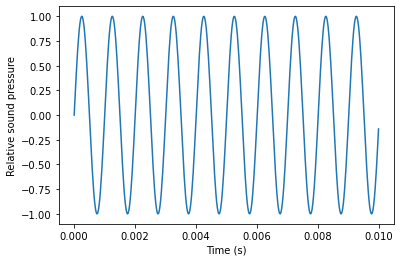

In [6]:
frequency = 1000

duration = 1
rate = 44100

times = np.linspace(0, 1, rate*duration )
signal=np.sin(2*np.pi*frequency*times)
plt.plot(times[:441], signal[:441])
plt.xlabel('Time (s)')
plt.ylabel('Relative sound pressure')
plt.show();
sd.play(signal, rate)


## What frequencies can you hear?

Adjust the slider below to find out what frequencies that you can hear from this computer at the low end of the frequency range. 

**Activity 2.2:** 
1. Write down the lowest frequency that you can hear. 
1. Write down the lowest frequency that still sounds like a musical note to you.

In [7]:
duration = 1
rate = 44100
times = np.linspace(0, duration, rate*duration )
def play_tone( cycle_rate=100):
    duration_samples=int(cycle_rate*duration)
    signal=10*np.sin(2*np.pi*cycle_rate*times)
    sd.play(signal, rate)
    return()
interact(play_tone, cycle_rate=(2, 100, 2));





interactive(children=(IntSlider(value=100, description='cycle_rate', min=2, step=2), Output()), _dom_classes=(…

Now adjust the slider below to find out what frequencies you can hear from this computer at the high end of the frequency range.

**Activity 2.3: Write down the highest frequency that you can hear. Compare with the other students in the lab. Compare with the lab instructor.**

In [8]:
duration = 1
rate = 44100
times = np.linspace(0, duration, rate*duration )
def play_tone( cycle_rate=10000):
    duration_samples=int(cycle_rate*duration)
    signal=20*np.sin(2*np.pi*cycle_rate*times)
    sd.play(signal, rate)
    return()
interact(play_tone, cycle_rate=(15000, 22000, 100));





interactive(children=(IntSlider(value=15000, description='cycle_rate', max=22000, min=15000, step=100), Output…

The usual reference hearing range for humans is considered to be 20 Hz to 20 kHz. Adults often have hearing loss at high frequencies and may only be able to hear up to 15 kHz to 17 kHz.



## Visualizing Frequency Content of Signals

Just as we can plot the sound pressure as a function of time for a recorded signal, we can also process a recorded signal to determine how much signal power is at each frequency.

We will us a function from SciPy's signal library called `periodogram` to extract the frequency information from the signal. Let's start by loading the audio signals for Beethoven's tuning fork and the UF E tuning fork:

In [12]:
rateA, dataA = wavfile.read('../audio_files/beethoven-forkA.wav')
dataA=dataA[:,0]
rateE, dataE = wavfile.read('../audio_files/forkE-UF.wav')

Now we will call the `periodogram()` function. The arguments are the data and the sampling rate. The outputs are captured as:
* fA is a list of frequencies generated by the periodogram
* PA is a list of the measured power at each of the frequencies

In [13]:
(fA, PA) = periodogram(dataA, rateA)

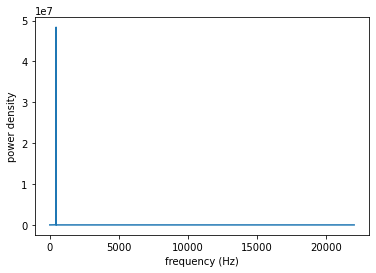

In [14]:
plt.plot(fA, PA)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

Let's zoom in to look at only those frequencies less than 500 Hertz:

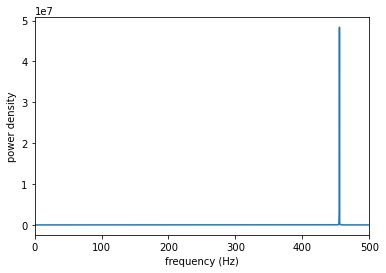

In [15]:
plt.plot(fA, PA)
plt.xlim(0, 500)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

We can see that the signal is concentrated at a single frequency somewhere near 450 Hz. Let's zoom in between 440 Hz and 460 Hz:

Text(0, 0.5, 'power density')

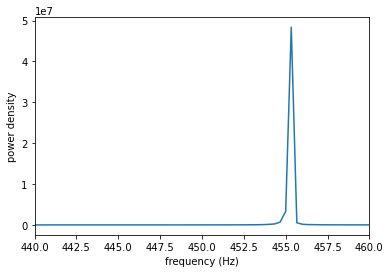

In [16]:
plt.plot(fA, PA)
plt.xlim(440,460)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density')

We can see that the frequency of Beethoven's tuning fork is about 455 Hz. Note that this tuning fork was used to provide a reference for a middle A note. A modern tuning fork for middle A uses 440 Hz. Thus, Beethoven's tuning fork produced a slightly higher pitch than a modern tuning fork and would be considered to be *sharp* by today's standards.

Now let's use the periodogram on the signal from the UF E tuning fork:

In [17]:
(fE, PE) = periodogram(dataE, rateE)

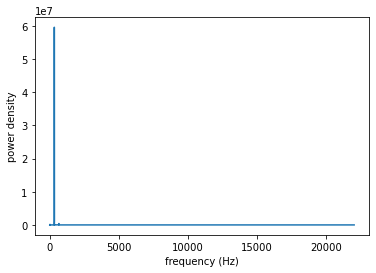

In [18]:
plt.plot(fE, PE)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

Again, the tuning fork's frequency content seems to be at a single frequency (as expected), and the frequency is less than 500 Hz, so let's zoom in to that range:

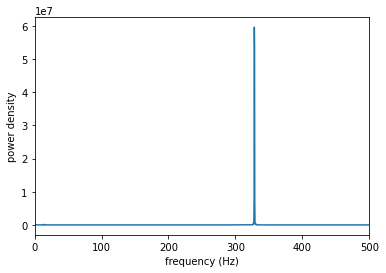

In [19]:
plt.plot(fE, PE)
plt.xlim(0, 500)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

This time we can observe that the frequency is around 330 Hz, so let's zoom in between 325 Hz and 335 Hz:

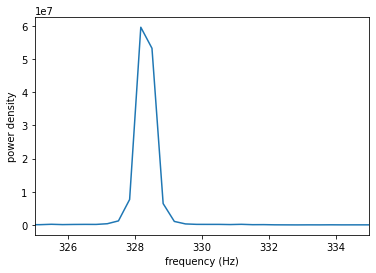

In [20]:
plt.plot(fE, PE)
plt.xlim(325, 335)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

The periodogram indicates that this tuning for is around 329 Hz. According to the packaging the tuning fork should resonate at a 329.6 Hz.

Tuning forks are designed to generate a tone that is at exactly one frequency, and we observe that in the periodograms. However, that makes for periodograms that are not very interesting!



## Richer Audio: Guitar

In [22]:
GuitarRate, GuitarData = wavfile.read('../audio_files/guitarE.wav')

Here is what that sounds like:

In [23]:
sd.play(GuitarData, GuitarRate)

And here is what the guitar sound pressure looks like over time:

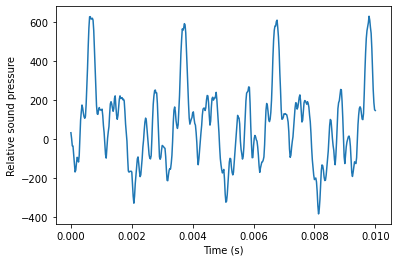

In [24]:
duration = 0.01
times=np.linspace(0,duration, int(duration*GuitarRate))
plt.plot(times, GuitarData[:int(duration*GuitarRate)])
plt.xlabel('Time (s)')
plt.ylabel('Relative sound pressure');

**Question 2.4: What do you observe? How is this similar to, and different from, the tuning fork signals?**

*As with the tuning fork data, there is a repeating pattern. However,*
* the pattern is much more complicated than for the tuning forks
* it is not a sinusoid


In [25]:
(GuitarF, GuitarP) = periodogram(GuitarData, GuitarRate)

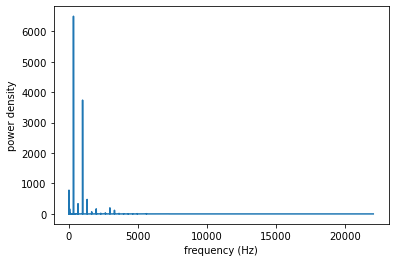

In [26]:
plt.plot(GuitarF, GuitarP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

Notice that even though we are playing **the same note** as the E tuning fork, we get a different periodogram.  Let's zoom into the region where most of the signal power is:

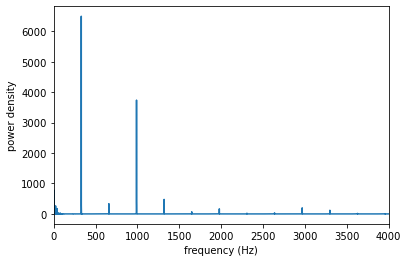

In [27]:
plt.plot(GuitarF, GuitarP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density')
plt.xlim(0,4000);

And let's zoom in one more time:

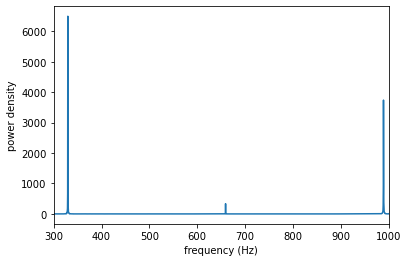

In [28]:
plt.plot(GuitarF, GuitarP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density')
plt.xlim(300,1000);

**Question 2.5: Recall that the E note is at about 330 Hz. How do the other components in this plot relate to that frequency?**

*Answer: the other frequency components are multiples of 330 Hz. In  this plot, we see 660 Hz and 990 Hz.**

For a given note, an instrument's sound can be decomposed into several parts:

* The **fundamental frequency** (or simply fundamental) is the lowest frequency component.
* The **harmonic frequencies** (or simply harmonics) are higher frequency components that are integer multiples of the fundamental frequency.


The cell below will play the fundamental frequency of the guitar and let you adjust the number of harmonics using a slider. 

**Activity 2.6:** Write down the number of harmonics you feel are needed for the resulting signal to like the original guitar.

In [29]:
rate = 44100
times = np.linspace(0, 1, rate )
def filter_guitar( harmonics=0):
    order = 10 
    cutoff = (harmonics+1)*330+330/4
    sos= butter(order, cutoff, btype='low',fs=rate,  output='sos')
    FilterData = sosfilt(sos, GuitarData/GuitarData.max())
    #plt.plot(FilterData)
    sd.play(FilterData, rate)
    (FilterF, FilterP) = periodogram(FilterData, rate)
    plt.plot(FilterF, FilterP)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power density')
    plt.xlim(0,6000)
    plt.show();

    return;
interact(filter_guitar, harmonics=(0,18,1));

interactive(children=(IntSlider(value=0, description='harmonics', max=18), Output()), _dom_classes=('widget-in…

## Richer Audio: Human Voice

### Optional: Record Your Voice

If you have a working microphone set up with working pyaudio and wave libraries, you can record your voice for the following exercises. If not, skip ahead to ...

Start by loading the libraries and creating the record function by running the following cell:

In [30]:
# This block defines a function that can be used to capture audio
# to a specified filename and for a specified duration. Read the 
# comments in the function for more details


import pyaudio
import wave

def record(filename, duration = 3, rate = 44100):
    # Record audio from the system standard audio device, 
    # plot the output, and save the data as a WAV file.
    #
    # Audio is captured as soon as the function is run.
    #
    # Parameters
    #     filename = name of file to save as (recommend using .wav extension)
    #     duration = length of audio recording (defaults to 3s) 
    #     rate = sampling rate (44100 is widely compatible)
    #
    # Returns
    #     rate = sampling rate (to have same outputs as wavfile.read() )
    #     data = data in ndarray format
    #
    # Examples
    # To record 3s to the file "tuningA.wav", call the function like
    #     record("tuningA.wav")
    #
    # To record 5s to the file "voice.wav", call the function like
    #     record("voice.wav", 5)
    #
    # Note that when you run  this block, the function is defined, but
    # it will not record any audio until you call this function in a later block
    #
    # John M. Shea
    # 6/1/2021

   
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=rate,
                    input=True,
                    frames_per_buffer=CHUNK)
    display.clear_output()
    print("* recording")

    frames = []

    for i in range(0, int(rate / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)


    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(rate)
    wf.writeframes(b''.join(frames))
    wf.close()

    time=np.linspace(0, duration, int(rate/CHUNK*duration)*CHUNK)
    #data=np.frombuffer(frames[0], dtype=np.int16)
    #for frame in range(1,len(frames)):
    #    data=np.hstack((data, np.frombuffer(frames[frame], dtype=np.int16)))
    data = np.frombuffer(b''.join(frames), dtype=np.int16)
    
    plt.plot(time, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Relative sound pressure')

    
    return rate, data




While singing a note (laaaaaa) and run the two blocks below after you have started singing. Keep singing the note until the recording is done (3 seconds). If you do not have a working microphone step, skip this step and follow the directions below.

**Note that it is important that you sing a single tone -- other types of voice recordings will not have the frequency content that we expect with a fundamental and harmonic tones.**

In [ ]:
VoiceRate, VoiceData = record('voice.wav')

### Pre-recorded Voice

If you did NOT record your voice, run the following cell. Otherwise, skip ahead to **Analyzing Voice Data**

In [34]:
# Run only if you did not record your voice

VoiceRate, VoiceData = wavfile.read('../audio_files/voice-example.wav')

### Analyzing Voice Data

Let's look at the voice data in the time domain first:

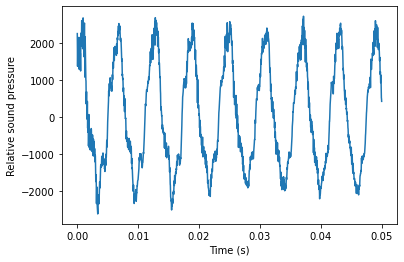

In [35]:
duration = 0.05
times=np.linspace(0,duration, int(duration*VoiceRate))
plt.plot(times, VoiceData[:int(duration*VoiceRate)])
plt.xlabel('Time (s)')
plt.ylabel('Relative sound pressure');

Now apply the periodogram and plot the power at different frequencies:

In [36]:
(VoiceF, VoiceP) = periodogram(VoiceData, VoiceRate)

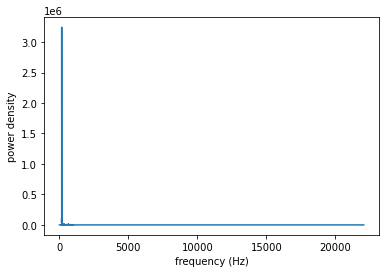

In [37]:
plt.plot(VoiceF, VoiceP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');

**IMPORTANT: The following examples will depend on your recording! Change the value of high_cutoff based on what you see in the plot above. I am using values based on the example recording.**

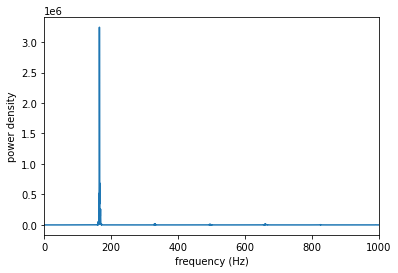

In [38]:
high_cutoff = 1000 #Change this number based on your data!

plt.plot(VoiceF, VoiceP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');
plt.xlim(0,high_cutoff);

And let's zoom in one more time to find the fundamental frequency and check the harmonics:

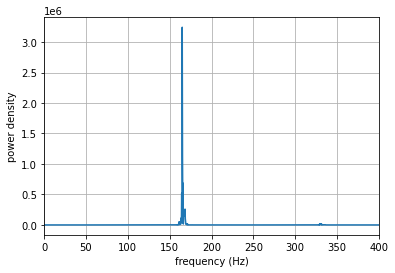

In [39]:
high_cutoff = 400 #Change this number based on your data!

plt.plot(VoiceF, VoiceP)
plt.xlabel('frequency (Hz)')
plt.ylabel('power density');
plt.xlim(0,high_cutoff);
plt.grid();

If you are using the voice example, you can see that the fundamental is at about 165 Hz, and the first harmonic is at about 330 Hz. This is because this example was created by singing an octave below the E tuning fork.

Now use the block below to investigate the sound when the number of harmonics is changed. 

**IMPORTANT: Set the value of `fundamental` to the fundamental frequency of your data (found from the plot above) before running the block!**

In [40]:
fundamental = 165

duration=3
rate = VoiceRate
times = np.linspace(0, 1, rate )
def filter_voice( harmonics=0):
    order = 10 
    cutoff = (harmonics+1)*fundamental+fundamental/4
    sos= butter(order, cutoff, btype='low',fs=rate,  output='sos')
    FilterData = sosfilt(sos, VoiceData/VoiceData.max())
    #plt.plot(FilterData)
    sd.play(FilterData, rate)
    (FilterF, FilterP) = periodogram(FilterData, rate)
    plt.plot(FilterF, FilterP)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power density')
    plt.xlim(0,4000)
    plt.show();

    return;
interact(filter_voice, harmonics=(0,18,1));

interactive(children=(IntSlider(value=0, description='harmonics', max=18), Output()), _dom_classes=('widget-in…

**Activity 2.7: How many harmonics are needed before this sounds like a voice?**

**Activity 2.8 (Optional, requires recording): Go back and record human speech and repeat all the voice data analysis. How is the time signal different than for singing a note? How is the frequency signal different than for singing a note?**